# TREATING MISSING VALUES IN PYTHON 

In [67]:
import os
import pandas as pd
import numpy as np
import seaborn as sns

In [68]:
os.chdir('D://python')

In [69]:
Cars_data=pd.read_csv('Toyota.csv',na_values=["??","????"])

In [70]:
Cars_data.head()

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.0,46986.0,Diesel,90.0,1.0,0,2000,three,1165
1,1,13750,23.0,72937.0,Diesel,90.0,1.0,0,2000,3,1165
2,2,13950,24.0,41711.0,Diesel,90.0,NaN,0,2000,3,1165
3,3,14950,26.0,48000.0,Diesel,90.0,0.0,0,2000,3,1165
4,4,13750,30.0,38500.0,Diesel,90.0,0.0,0,2000,3,1170


In [71]:
cars=Cars_data.copy()

In [72]:
cars.dtypes

Unnamed: 0      int64
Price           int64
Age           float64
KM            float64
FuelType       object
HP            float64
MetColor      float64
Automatic       int64
CC              int64
Doors          object
Weight          int64
dtype: object

In [73]:
cars.isnull().sum()

Unnamed: 0      0
Price           0
Age           100
KM             15
FuelType      100
HP              6
MetColor      150
Automatic       0
CC              0
Doors           0
Weight          0
dtype: int64

In [74]:
cars.shape

(1436, 11)

# To drop missing values:

In [75]:
cars_omit=cars.dropna(axis=0)

In [76]:
cars_omit.head()

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.0,46986.0,Diesel,90.0,1.0,0,2000,three,1165
1,1,13750,23.0,72937.0,Diesel,90.0,1.0,0,2000,3,1165
3,3,14950,26.0,48000.0,Diesel,90.0,0.0,0,2000,3,1165
4,4,13750,30.0,38500.0,Diesel,90.0,0.0,0,2000,3,1170
5,5,12950,32.0,61000.0,Diesel,90.0,0.0,0,2000,3,1170


In [77]:
cars_omit.isnull().sum()

Unnamed: 0    0
Price         0
Age           0
KM            0
FuelType      0
HP            0
MetColor      0
Automatic     0
CC            0
Doors         0
Weight        0
dtype: int64

In [78]:
cars_omit.shape

(1096, 11)

# Another way: To treat missing values:

In [79]:
Cars_data.head()

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.0,46986.0,Diesel,90.0,1.0,0,2000,three,1165
1,1,13750,23.0,72937.0,Diesel,90.0,1.0,0,2000,3,1165
2,2,13950,24.0,41711.0,Diesel,90.0,NaN,0,2000,3,1165
3,3,14950,26.0,48000.0,Diesel,90.0,0.0,0,2000,3,1165
4,4,13750,30.0,38500.0,Diesel,90.0,0.0,0,2000,3,1170


-Replace missing values in continuous variables with mean(if outliers are not present), median.
-Replace missing values in categorical variables with mode.

In [80]:
Cars_data.isnull().sum()

Unnamed: 0      0
Price           0
Age           100
KM             15
FuelType      100
HP              6
MetColor      150
Automatic       0
CC              0
Doors           0
Weight          0
dtype: int64

<AxesSubplot:ylabel='Age'>

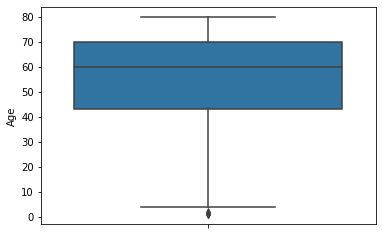

In [81]:
sns.boxplot(data=Cars_data,y='Age')

<AxesSubplot:ylabel='KM'>

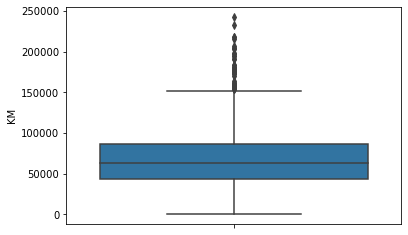

In [82]:
sns.boxplot(data=Cars_data,y='KM')

In [83]:
# Filling  missing values:

In [84]:
Cars_data['Age'].fillna(Cars_data['Age'].mean(),inplace=True)

In [85]:
Cars_data['KM'].fillna(Cars_data['KM'].median(),inplace=True)

In [86]:
Cars_data.isnull().sum()

Unnamed: 0      0
Price           0
Age             0
KM              0
FuelType      100
HP              6
MetColor      150
Automatic       0
CC              0
Doors           0
Weight          0
dtype: int64

<AxesSubplot:ylabel='HP'>

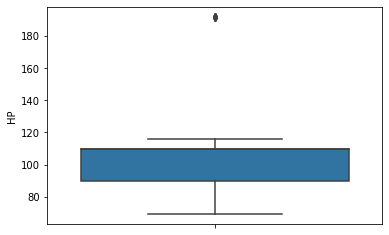

In [87]:
sns.boxplot(data=Cars_data,y='HP')

In [88]:
Cars_data['HP'].fillna(Cars_data['HP'].median(),inplace=True)

In [89]:
Cars_data.isnull().sum()

Unnamed: 0      0
Price           0
Age             0
KM              0
FuelType      100
HP              0
MetColor      150
Automatic       0
CC              0
Doors           0
Weight          0
dtype: int64

In [90]:
Cars_data['FuelType'].value_counts()

Petrol    1177
Diesel     144
CNG         15
Name: FuelType, dtype: int64

In [91]:
Cars_data['FuelType'].fillna(Cars_data['FuelType'].value_counts().index[0],inplace=True)

In [92]:
Cars_data.isnull().sum()

Unnamed: 0      0
Price           0
Age             0
KM              0
FuelType        0
HP              0
MetColor      150
Automatic       0
CC              0
Doors           0
Weight          0
dtype: int64

In [93]:
Cars_data['MetColor'].fillna(Cars_data['MetColor'].mode().index[0],inplace=True)

In [94]:
Cars_data.isnull().sum()

Unnamed: 0    0
Price         0
Age           0
KM            0
FuelType      0
HP            0
MetColor      0
Automatic     0
CC            0
Doors         0
Weight        0
dtype: int64